<a href="https://colab.research.google.com/github/carol-alcan/google_trends_mercado_financeiro/blob/main/pytrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install vectorbt
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from pytrends.request import TrendReq
import yfinance as yf
import vectorbt as vbt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime

In [6]:
pytrends = TrendReq(hl= 'pt-BR', tz = 360)

In [7]:
termos = ['petrobras', 'dólar']

In [8]:
pytrends.build_payload(termos, cat=0, timeframe= 'all', geo = 'BR', gprop= '')
busca = pytrends.interest_over_time()

In [9]:
busca.head()

,petrobras,dólar,isPartial
date,,,
2004-01-01,65,5,False
2004-02-01,81,8,False
2004-03-01,32,5,False
2004-04-01,27,6,False
2004-05-01,36,8,False


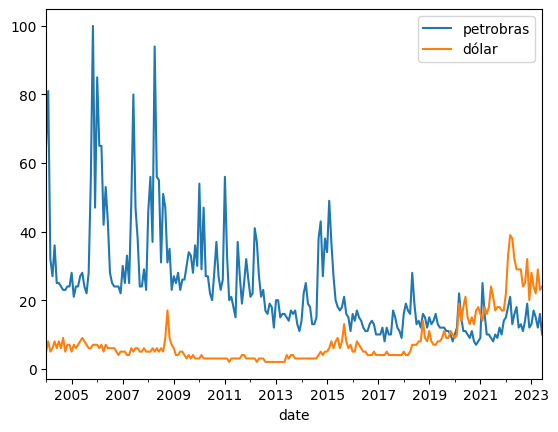

In [10]:
busca[['petrobras', 'dólar']].plot();

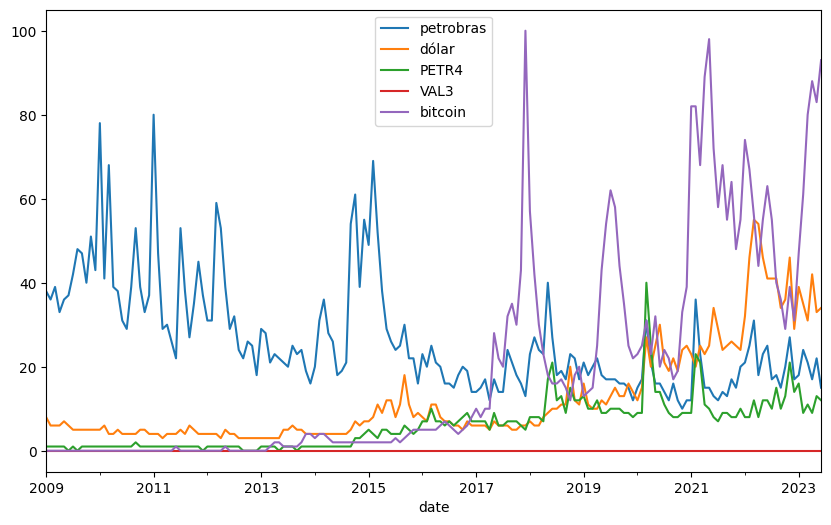

In [11]:
pytrends = TrendReq(hl= 'pt-BR', tz = 360)
lista_termos = ['petrobras', 'dólar', 'PETR4', 'VAL3', 'bitcoin']
pytrends.build_payload(lista_termos, cat=0, timeframe= '2008-12-14 2023-06-14', geo = 'BR', gprop= '')
busca = pytrends.interest_over_time()
busca[lista_termos].plot(figsize = (10,6));


1.2 Cruzamento das informações do Google Trends com Mercado Financeiro

1.2.1 Pré-processamento do dado

In [12]:
busca.index.name = 'Date'

In [13]:
busca.head()

,petrobras,dólar,PETR4,VAL3,bitcoin,isPartial
Date,,,,,,
2009-01-01,38,8,1,0,0,False
2009-02-01,36,6,1,0,0,False
2009-03-01,39,6,1,0,0,False
2009-04-01,33,6,1,0,0,False
2009-05-01,36,7,1,0,0,False


In [14]:
busca.shape

(174, 6)

In [15]:
busca.index = pd.to_datetime(busca.index)

In [16]:
busca.head()

,petrobras,dólar,PETR4,VAL3,bitcoin,isPartial
Date,,,,,,
2009-01-01,38,8,1,0,0,False
2009-02-01,36,6,1,0,0,False
2009-03-01,39,6,1,0,0,False
2009-04-01,33,6,1,0,0,False
2009-05-01,36,7,1,0,0,False


In [17]:
busca.index[0].strftime("%Y-%m-%d")

'2009-01-01'

In [18]:
from yfinance.utils import auto_adjust

Extração das cotações

In [19]:
dolar = yf.download('USDBRL=X', start = busca.index[0].strftime("%Y-%m-%d"),auto_adjust= True)

[*********************100%***********************]  1 of 1 completed


In [20]:
dolar.index = pd.to_datetime(dolar.index)

In [21]:
pd.merge(busca, dolar, how = 'inner', on = 'Date')

,petrobras,dólar,PETR4,VAL3,bitcoin,isPartial,Open,High,Low,Close,Volume
Date,,,,,,,,,,,
2009-01-01,38,8,1,0,0,False,2.324000,2.3240,2.324000,2.324000,0
2009-04-01,33,6,1,0,0,False,2.249500,2.3148,2.249500,2.278500,0
2009-05-01,36,7,1,0,0,False,2.122000,2.1220,2.122000,2.180000,0
2009-07-01,42,5,1,0,0,False,1.902500,1.9506,1.902500,1.928000,0
2009-09-01,47,5,1,0,0,False,1.822400,1.9130,1.822400,1.913000,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,17,29,14,0,31,False,5.181589,5.2141,5.163200,5.181589,0
2023-02-01,24,35,9,0,61,False,5.072200,5.0868,5.047900,5.072200,0
2023-03-01,21,31,11,0,80,False,5.235900,5.2367,5.188100,5.235900,0


In [22]:
total = pd.merge(busca, dolar, how = 'inner', on = 'Date')[['dólar', 'Close']]

1.2.2 Plotagem da informação

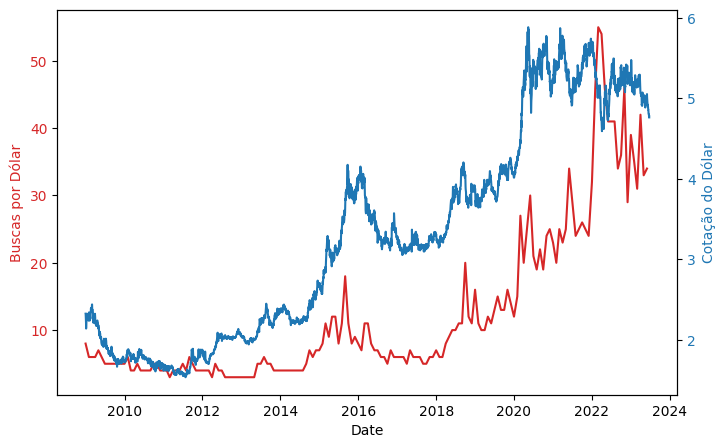

In [23]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Buscas por Dólar', color=color)
ax1.plot(busca.index, busca['dólar'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2=ax1.twinx()#Configurar um outro eixo vertical que compartilha o mesmo eixo x

color = 'tab:blue'
ax2.set_ylabel('Cotação do Dólar', color=color)
ax2.plot(dolar.index, dolar['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

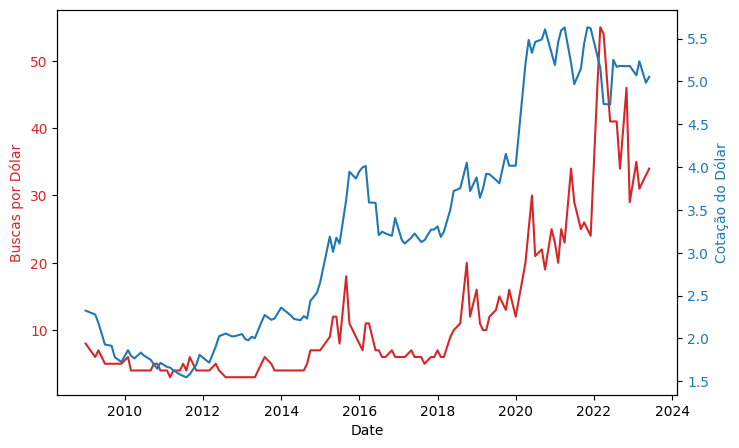

In [24]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Buscas por Dólar', color=color)
ax1.plot(total.index, total['dólar'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2=ax1.twinx()#Configurar um outro eixo vertical que compartilha o mesmo eixo x

color = 'tab:blue'
ax2.set_ylabel('Cotação do Dólar', color=color)
ax2.plot(total.index, total['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y":True}]])

#Add traces
fig.add_trace(
    go.Scatter(x= busca.index, y= busca['dólar'], name="Busca pelo dólar"),
    secondary_y= True
)

fig.add_trace(
    go.Scatter(x= dolar.index, y= dolar['Close'], name="Cotação do dólar"),
    secondary_y= False
)

#Add figure title
fig.update_layout(
    title_text= "Buscas no google vs. cotação"
)

#Set x-axis title
fig.update_xaxes(title_text="Date")

#Set y axis titles
fig.update_yaxes(title_text="<b>primary</b> Buscas no google", secondary_y=False)
fig.update_yaxes(title_text="<b>primary</b> Cotação do dólar", secondary_y=True)

fig.show()

1.2.3 Comparativo de ações

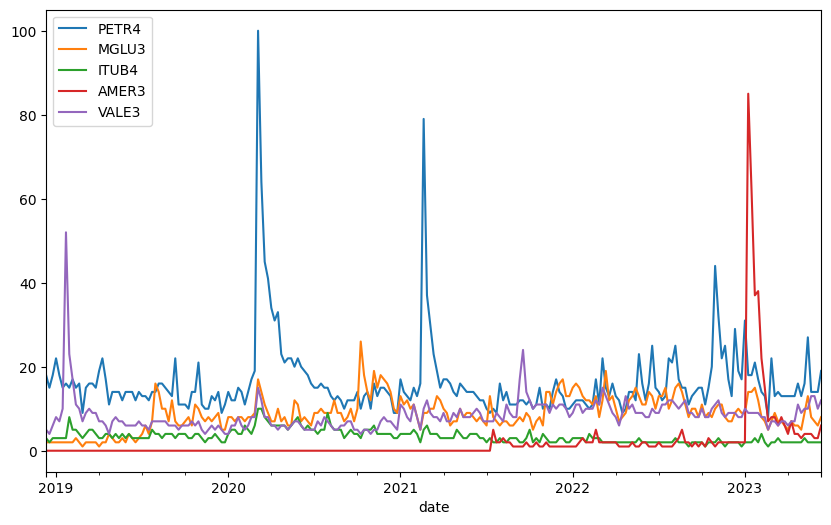

In [26]:
pytrends = TrendReq(hl= 'pt-BR', tz = 360)
acoes = ['PETR4', 'MGLU3', 'ITUB4', 'AMER3', 'VALE3']
pytrends.build_payload(acoes, cat=0, timeframe= '2018-12-14 2023-06-14', geo = 'BR', gprop= '')
busca_acoes = pytrends.interest_over_time()
busca_acoes[acoes].plot(figsize = (10,6));

1.2.4 Petrobras vs. PETR4

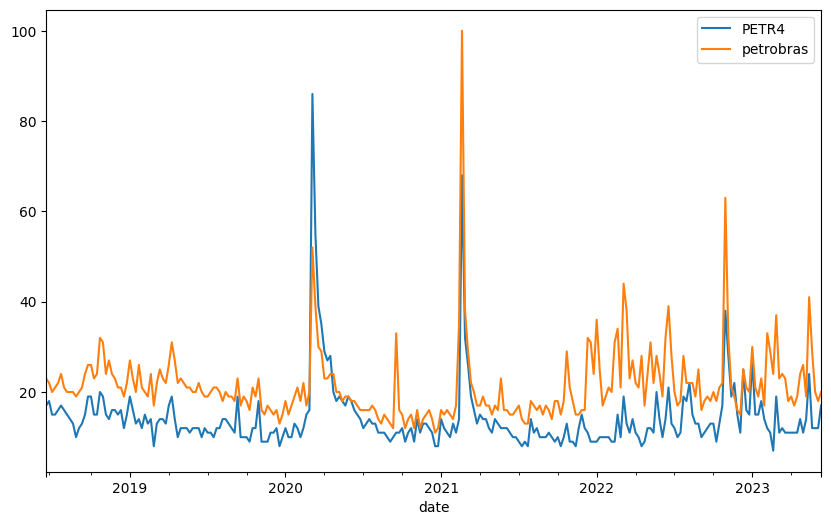

In [27]:
pytrends = TrendReq(hl= 'pt-BR', tz = 360)
termos = ['PETR4', 'petrobras']
pytrends.build_payload(termos, cat=0, timeframe= 'today 5-y', geo = 'BR', gprop= '')
busca_petro = pytrends.interest_over_time()
busca_petro[termos].plot(figsize = (10,6));

In [28]:
busca_petro.head()

,PETR4,petrobras,isPartial
date,,,
2018-06-24,17,23,False
2018-07-01,18,22,False
2018-07-08,15,20,False
2018-07-15,15,21,False
2018-07-22,16,22,False


In [29]:
busca_petro.index.name='Date'

In [30]:
busca_petro.head()

,PETR4,petrobras,isPartial
Date,,,
2018-06-24,17,23,False
2018-07-01,18,22,False
2018-07-08,15,20,False
2018-07-15,15,21,False
2018-07-22,16,22,False


In [31]:
busca_petro.shape

(260, 3)

In [32]:
busca_petro.index= pd.to_datetime(busca_petro.index)

In [33]:
busca_petro.head()

,PETR4,petrobras,isPartial
Date,,,
2018-06-24,17,23,False
2018-07-01,18,22,False
2018-07-08,15,20,False
2018-07-15,15,21,False
2018-07-22,16,22,False


In [34]:
busca_petro.index[0].strftime("%Y-%m-%d")

'2018-06-24'

In [35]:
petro = yf.download('PETR4.SA',start = busca_petro.index[0].strftime("%Y-%m-%d"), auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [36]:
petro.index = pd.to_datetime(petro.index)

In [37]:
#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y":True}]])

#Add traces
fig.add_trace(
    go.Scatter(x= busca_petro.index, y= busca_petro['petrobras'], name="Busca por Petrobras"),
    secondary_y= False
)

fig.add_trace(
    go.Scatter(x= busca_petro.index, y= busca_petro['PETR4'], name="Busca por PETR4"),
    secondary_y= False
)

fig.add_trace(
    go.Scatter(x= petro.index, y= petro['Close'], name="Cotação do PETR4"),
    secondary_y= True
)

#Add figure title
fig.update_layout(
    title_text= "Cotação de PETR4 vs. buscas no google"
)

#Set x-axis title
fig.update_xaxes(title_text="Data")

#Set y axis titles
fig.update_yaxes(title_text="<b>primary</b> Intensidade das buscas", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Preço de PETR4", secondary_y=True)

fig.show()

In [38]:
busca_petro['busca_total'] = busca_petro['PETR4'] + busca_petro['petrobras']

In [39]:
#Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y":True}]])

#Add traces
fig.add_trace(
    go.Scatter(x= busca_petro.index, y= busca_petro['busca_total'], name="Busca por PETR4"),
    secondary_y= False
)

fig.add_trace(
    go.Scatter(x= petro.index, y= petro['Close'], name="Cotação do PETR4"),
    secondary_y= True
)

#Add figure title
fig.update_layout(
    title_text= "Cotação de PETR4 vs. buscas no google"
)

#Set x-axis title
fig.update_xaxes(title_text="Data")

#Set y axis titles
fig.update_yaxes(title_text="<b>primary</b> Intensidade das buscas", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Preço de PETR4", secondary_y=True)

fig.show()

2. Explorando as funcionalidades da biblioteca

Problemas com a função "get_historical_interest" ( foi descontinuada devido a um erro que trazia os dados distorcidos. O código esta em: https://github.com/GeneralMills/pytrends)

---



In [40]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
kw_list = ['petrobras', 'dólar']

Função "multirange_interest_over_time"

In [41]:
pytrends.build_payload(kw_list = ['lion', 'cat'], timeframe = ['2019-09-04 2022-09-10', '2019-09-18 2022-09-24'])
data = pytrends.multirange_interest_over_time()

In [42]:
data

,[0] lion date,[0] lion value,[1] cat date,[1] cat value
0,Average,20,Average,76
1,"Sep 8 – 14, 2019",27,"Sep 22 – 28, 2019",67
2,"Sep 15 – 21, 2019",25,"Sep 29 – Oct 5, 2019",69
3,"Sep 22 – 28, 2019",26,"Oct 6 – 12, 2019",68
4,"Sep 29 – Oct 5, 2019",27,"Oct 13 – 19, 2019",71
...,...,...,...,...
153,"Aug 7 – 13, 2022",19,"Aug 21 – 27, 2022",83
154,"Aug 14 – 20, 2022",18,"Aug 28 – Sep 3, 2022",81
155,"Aug 21 – 27, 2022",19,"Sep 4 – 10, 2022",73
156,"Aug 28 – Sep 3, 2022",19,"Sep 11 – 17, 2022",78


Métodos gerais

In [43]:
pytrend = TrendReq(geo = 'BR')

In [44]:
pytrend.trending_searches(pn = 'brazil')

,0
0,Inverno
1,Fernanda Campos Neymar
2,Lucia Hippolito
3,Lana Del Rey
4,Pablo Marçal
5,Solstício de inverno
6,Cruzeiro x Fortaleza
7,Gundogan
8,Invasão Secreta
9,Sabatina Zanin


Buscas anuais

In [46]:
pytrend.top_charts(2022, hl = 'pt-BR', geo = 'BR')

,title,exploreQuery
0,Eleições 2022,
1,Copa do Mundo 2022,
2,Brasileirão,brasileirao
3,BBB 22,
4,Lula,
5,Flamengo x Corinthians,
6,Banco Central,
7,Copinha,
8,Série B,
9,TSE,tse


3. Backtesting Bitcoin: trends vs. preço

3.1 Obtenção de dados

In [47]:
pytrend = TrendReq()

In [48]:
termos = ['Bitcoin']

In [49]:
pytrend.build_payload(termos, timeframe= '2019-01-01 2023-06-15', cat = 7, geo = '')

In [50]:
dados_bitcoin = pytrend.interest_over_time()

In [51]:
dados_bitcoin

,Bitcoin,isPartial
date,,
2019-01-06,11,False
2019-01-13,11,False
2019-01-20,10,False
2019-01-27,10,False
2019-02-03,11,False
...,...,...
2023-05-14,22,False
2023-05-21,22,False
2023-05-28,22,False


Cotação do Bitcoin

In [52]:
preco_btc = yf.download('BTC-USD', start = dados_bitcoin.index[0].strftime('%Y-%m-%d'), auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [53]:
dados_bitcoin.index.name='Date'

In [54]:
dados_bitcoin.index= pd.to_datetime(dados_bitcoin.index)
preco_btc.index= pd.to_datetime(preco_btc.index)

3.2 Visualização de dados

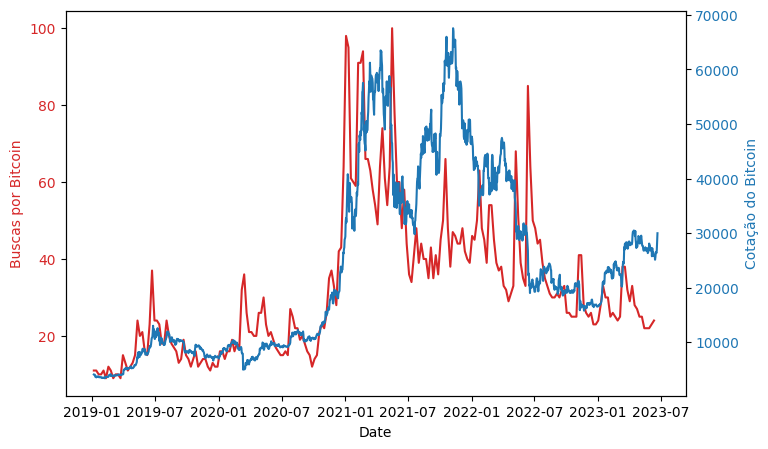

In [55]:
fig, ax1 = plt.subplots(figsize = (8,5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Buscas por Bitcoin', color = color)
ax1.plot(dados_bitcoin.index, dados_bitcoin['Bitcoin'], color = color)
ax1.tick_params(axis= 'y', labelcolor= color)

ax2 = ax1.twinx()#Configurar um outro eixo vertical que compartilha o mesmo eixo x

color = 'tab:blue'
ax2.set_ylabel('Cotação do Bitcoin', color = color)
ax2.plot(preco_btc.index, preco_btc['Close'], color = color)
ax2.tick_params(axis= 'y', labelcolor= color)

plt.show()

In [56]:
trends_btc = pd.merge(dados_bitcoin, preco_btc, how= 'inner', on= 'Date')[['Bitcoin', 'Close']]

In [57]:
trends_btc

,Bitcoin,Close
Date,,
2019-01-06,11,4076.632568
2019-01-13,11,3552.953125
2019-01-20,10,3601.013672
2019-01-27,10,3583.965820
2019-02-03,11,3464.013428
...,...,...
2023-05-14,22,26930.638672
2023-05-21,22,26753.826172
2023-05-28,22,28085.646484


In [58]:
trends_btc.index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10',
               ...
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14', '2023-05-21', '2023-05-28',
               '2023-06-04', '2023-06-11'],
              dtype='datetime64[ns]', name='Date', length=232, freq=None)

Vamos normalizar os dados de preço e trends para que fique em uma unidade comparável.

In [59]:
trends_btc_normalizado = trends_btc/trends_btc.iloc[0]

In [60]:
trends_btc_normalizado.vbt.plot().update_layout(template='simple_white', width=800, height=400,
                                                title_text='<b>Bitcoin: preço x trends',
                                                xaxis_title= "<b>Data", yaxis_title="<b>Valor normalizado").show()

Ao olhar para o gráfico acima, fica bem sugestivo que as duas variáveis estão caminhando juntas.

3.3 Criação e backtesting da estratégia

Para backtestar nossa teoria, poderíamos pensar em uma estratégia de comprar o ativo nos momenros onde houve aumento das pesquisas em relação aos períodos anteriores.

Nesse sentido, o desvio padrão pode ser uma ferramenta interessante para ver quanto as pesquisas estão divergindo da média.

As bandas de bollinger podem nos ajudar nessa tarefa. Elas são representadas por 3 linhas, onde:
A linha central é a média de n períodos atrás(vamos definir n como 10, ou seja, média dos últimos 10 dias).
A linha superior = média + x desvios (aui vamos definir x como 1).
A linha inferior = média - x desvios (aqui vamos definir x como 1).
OBS: Tradicionalmente as Bandas de Bollinger são o preço de 20 perídos +- 2 desvios.

In [62]:
vbt.BBANDS.run(trends_btc['Bitcoin'], 10, alpha = 1).\
plot(template = 'simple_white', width = 800, height = 400).show()

Agora extraímos os valores das bandas superior e inferior para usar nos sinais de entrada.

In [63]:
BBand_sup_1std = vbt.BBANDS.run(trends_btc['Bitcoin'], 10, alpha = 1).upper
BBand_inf_1std = vbt.BBANDS.run(trends_btc['Bitcoin'], 10, alpha = 1).lower

Criamos uma estrutura booleana, se o número de pesquisa cruzar para cima a banda superior, compramos (entradas). Quando procurar ficarem abaixo da banda inferior, venderemos (exits).

In [69]:
entradas = trends_btc['Bitcoin'].vbt.crossed_above(BBand_sup_1std)
saidas = trends_btc['Bitcoin'].vbt.crossed_below(BBand_inf_1std)

Usando a vectorbt, criamos nosso backtesting, informando as variações no preço, nossas entradas e saídas, a frequencia para plotagem (W,weekly)além de outros parâmetros.
Para fins de simplificação, mostraremos apenas a ponta compradora(longonly) e não explicaremos os diversos parâmetros da biblioteca para otimizar o backtest e as estrategias.

In [70]:
setup_sentimento = vbt.Portfolio.from_signals(trends_btc['Close'], entradas, saidas, direction = 'longonly', freq = 'W')

In [71]:
setup_sentimento.plot().show()

In [74]:
setup_sentimento.stats()

Start                         2019-01-06 00:00:00
End                           2023-06-11 00:00:00
Period                         1624 days 00:00:00
Start Value                                 100.0
End Value                             1201.855087
Total Return [%]                      1101.855087
Benchmark Return [%]                   536.313613
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        62.124479
Max Drawdown Duration           574 days 00:00:00
Total Trades                                    9
Total Closed Trades                             9
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            66.666667
Best Trade [%]                         387.233259
Worst Trade [%]                         -28.59701
Avg Winning Trade [%]                  100.368359
Avg Losing Trade [%]                   -18.882029
